In [21]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [8]:
x, y = make_regression(n_samples=50, n_features=1, n_informative=1, n_targets=1, noise=5)

In [9]:
starting_slope = 0
starting_intercept = float(sum(y)) / len(y)

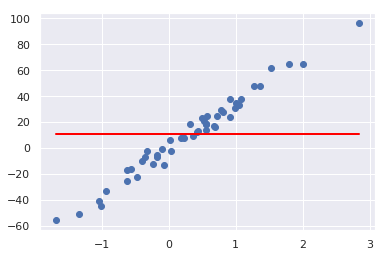

In [10]:
plt.scatter(x, y)
plt.plot(x, starting_slope * x + starting_intercept, c='red')

In [11]:
def mse(y_actual, y_pred):
    error = 0
    
    for y, y_prime in zip(y_actual, y_pred):
        error += (y - y_prime) ** 2
    
    return error

In [12]:
mse(y, starting_slope * x + starting_intercept)

array([46201.20786632])

In [13]:
def calculate_partial_derivatives(x, y, intercept, slope):
    partial_derivative_slope = 0
    partial_derivative_intercept = 0
    n = len(x)

    for i in range(n):
        
        xi = x[i]
        yi = y[i]

        partial_derivative_intercept += - (2/n) * (yi - ((slope * xi) + intercept))
        partial_derivative_slope += - (2/n) * xi * (yi - ((slope * xi) + intercept))
        
    return partial_derivative_intercept, partial_derivative_slope

In [14]:
def train(x, y, learning_rate, iterations, intercept, slope):

    for i in range(iterations):
        
        partial_derivative_intercept, partial_derivative_slope = calculate_partial_derivatives(x, y, intercept, slope)
            
        intercept = intercept - (learning_rate * partial_derivative_intercept)
        slope = slope - (learning_rate * partial_derivative_slope)
        
    return intercept, slope

In [15]:
learning_rate = 0.01
iterations = 300

In [16]:
intercept, slope = train(x, y, learning_rate, iterations, starting_intercept, starting_slope)

In [17]:
linear_regression_line = [slope * xi + intercept for xi in x]

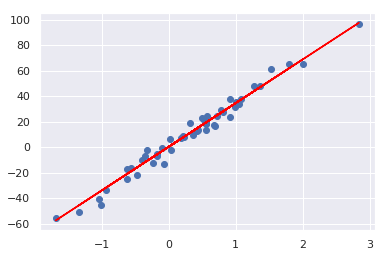

In [18]:
plt.scatter(x, y)
plt.plot(x, linear_regression_line, c='red')

In [19]:
mse(y, linear_regression_line)

array([1078.8125961])

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = lr.predict(x)

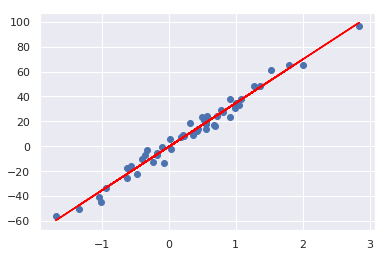

In [26]:
plt.scatter(x, y)
plt.plot(x, y_pred, c='red')

In [27]:
mse(y, y_pred)

1047.7236203095156